<a href="https://colab.research.google.com/github/rehoyt/Python-tapas/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyCaret 2.3**

PyCaret is a Python package that functions as a data science platform. It automates a machine learning pipeline with minimal Python coding. The platform lacks visualization tools and descriptive statistics but they are working on adding these tools. PyCaret will perform supervised and unsupervised learning (clustering, association rules, PCA), anomaly detection NLP, and time series analysis.  

The first step is to install the PyCaret package. We will install pycaret[full] which means all dependencies are loaded. 

Here is a good overall article on PyCaret by it's originator posted May 2021 https://medium.com/analytics-vidhya/pycaret-101-for-beginners-27d9aefd34c5

# **Install**

In [1]:
pip install pycaret[full]

     |████████████████████████████████| 266 kB 3.7 MB/s 
     |████████████████████████████████| 1.3 MB 26.2 MB/s 
     |████████████████████████████████| 6.8 MB 15.3 MB/s 
     |████████████████████████████████| 167 kB 43.6 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 2.0 MB 41.5 MB/s 
     |████████████████████████████████| 113 kB 60.8 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 261 kB 47.0 MB/s 
     |████████████████████████████████| 1.7 MB 43.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 356 kB 49.0 MB/s 
     |████████████████████████████████| 173.5 MB 12 kB/s 
     |████████████████████████████████| 131 kB 50.2 MB/s 
     |███████████████████

In [1]:
pip install pyyaml==5.4.1 # I needed to download this file to make PyCaret work properly in Setup

     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


# **Load Data**

Note that PyCaret comes with its own data to include the heart disease prediction dataset. We could upload the heart disease dataset separately and use pandas to upload it to PyCaret but it is easier to do everything in the same program. 

In [2]:
from pycaret.datasets import get_data
index = get_data('index') #It will now list the available datasets and what they are used for

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [3]:
data = get_data('heart_disease') # We're telling it to load the heart disease dataset. The dataset has been renamed = "data"

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# **Setup**

Setup involves naming the dataset (data) and the target (Disease). It will first display the variables and **if the data types are correct, hit enter**. If you don't hit enter the process will halt. This will then generate a myriad of data processing steps. Accept the defaults but realize that these are customizable. For example, it shows PCA = False. We could change that to true. 

In [4]:
from pycaret.classification import *  #We are importing the classification tools. After the first screen showing the data types hit ENTER and it will progress
clf1 = setup(data, target = 'Disease')

,Description,Value
0,session_id,8717
1,Target,Disease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(270, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


# **Modeling**

The next section first tells you what models are available in PyCaret. We will then compare performance by multiple models

In [5]:
models () 

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# **Select the Best Model**

For regression we will pay the most attention to AUC, F1 score and MCC

In [6]:
best_model = compare_models() #This gives you a model comparison. We will go with logistic regression. Note that they include F1, Kappa and MCC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8573,0.9110,0.8478,0.8619,0.8517,0.7143,0.7190,0.558
ridge,Ridge Classifier,0.8523,0.0000,0.8256,0.8688,0.8431,0.7038,0.7094,0.015
catboost,CatBoost Classifier,0.8518,0.9086,0.8256,0.8650,0.8428,0.7025,0.7059,1.634
lda,Linear Discriminant Analysis,0.8471,0.9110,0.8256,0.8615,0.8389,0.6936,0.7000,0.017
rf,Random Forest Classifier,0.8310,0.9043,0.7822,0.8634,0.8149,0.6611,0.6705,0.470
nb,Naive Bayes,0.8257,0.8572,0.8056,0.8505,0.8131,0.6527,0.6703,0.017
xgboost,Extreme Gradient Boosting,0.8199,0.8951,0.7822,0.8357,0.8064,0.6388,0.6417,3.016
lightgbm,Light Gradient Boosting Machine,0.8193,0.8933,0.8044,0.8266,0.8107,0.6374,0.6436,0.063
et,Extra Trees Classifier,0.8149,0.8838,0.7722,0.8469,0.7991,0.6301,0.6416,0.465
gbc,Gradient Boosting Classifier,0.7874,0.8804,0.7500,0.8109,0.7719,0.5744,0.5845,0.086


# **Create a Model with Logistic Regression**

Look at the mean performance

In [ ]:

lr = create_model('lr') # this is the result of k=10 fold cross validation. The mean gives the average of the 10 folds AUC = 0.9372

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8421,0.8523,0.7500,0.8571,0.8000,0.6705,0.6746
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8947,1.0000,1.0000,0.8000,0.8889,0.7912,0.8090
3,0.7895,0.8977,0.6250,0.8333,0.7143,0.5529,0.5673
4,0.8421,0.9318,0.8750,0.7778,0.8235,0.6816,0.6854
5,0.9474,0.9545,1.0000,0.8889,0.9412,0.8939,0.8989
6,0.9474,0.9659,0.8750,1.0000,0.9333,0.8902,0.8956
7,0.7895,0.9318,0.5000,1.0000,0.6667,0.5366,0.6055
8,0.9444,0.9500,0.8750,1.0000,0.9333,0.8861,0.8919
9,0.8889,0.8875,1.0000,0.8000,0.8889,0.7805,0.8000


# **Evaluate Model**

Notice ther multiple ways you can evaluate model discrimination and calibration. We also have the option to tune the algorithm but for simplicity sake, we will skip that step.
Similarly, we will not compare the test data to the training data performance but this is easy to do.

In [ ]:
evaluate_model(lr) #Select any of these boxes for visual performance measures

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Model Interpretability**

In order to use SHAP to explain a model we will use lightgbm, a boosting ensemble. 

In [9]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6316,0.7667,0.6000,0.6667,0.6316,0.2652,0.2667
1,0.8947,0.9333,0.8889,0.8889,0.8889,0.7889,0.7889
2,0.7368,0.8889,0.6667,0.7500,0.7059,0.4693,0.4719
3,0.7895,0.8000,0.7778,0.7778,0.7778,0.5778,0.5778
4,0.7895,0.8556,0.7778,0.7778,0.7778,0.5778,0.5778
5,0.9474,0.9333,1.0000,0.9000,0.9474,0.8950,0.9000
6,0.8947,0.9111,0.8889,0.8889,0.8889,0.7889,0.7889
7,0.8421,0.9556,0.6667,1.0000,0.8000,0.6780,0.7161
8,0.7778,0.9506,0.8889,0.7273,0.8000,0.5556,0.5698
9,0.8889,0.9383,0.8889,0.8889,0.8889,0.7778,0.7778


In [10]:
pip install shap

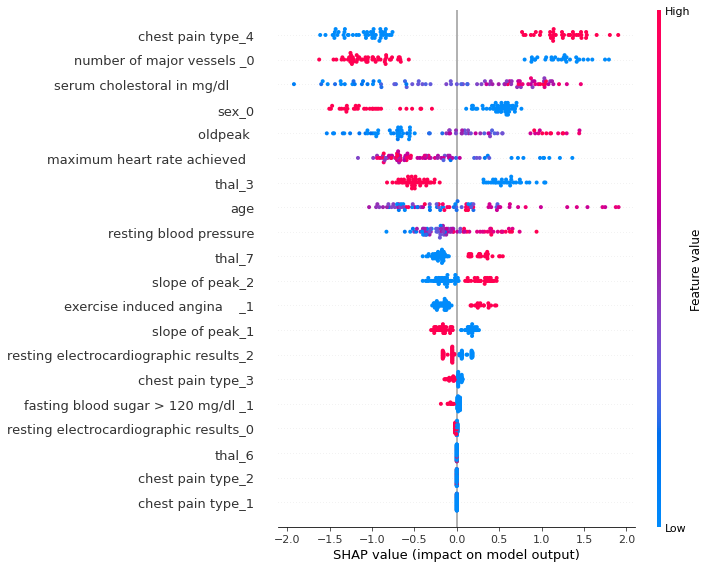

In [11]:
interpret_model(lightgbm)